In [23]:
import numpy as np
import os
import graphviz
import math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def partition(x):
    """
    Partition the column vector x into subsets indexed by its unique values (v1, ... vk)

    Returns a dictionary of the form
    { v1: indices of x == v1,
      v2: indices of x == v2,
      ...
      vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector x.
    """

    # INSERT YOUR CODE HERE

    dict = {}

    for i in range(0, x.shape[0]):
        if(x[i] in dict.keys()):
            dict[x[i]].append(i)
        else:
            dict[x[i]] = [i]

    return dict
    
    
    raise Exception('Function not yet implemented!')

In [3]:
a = np.array([1, 2, 2, 2, 4, 3, 3, 1, 1, 3, 4, 2, 3, 1, 1])
b = partition(a)
print(b)

{1: [0, 7, 8, 13, 14], 2: [1, 2, 3, 11], 4: [4, 10], 3: [5, 6, 9, 12]}


In [4]:
def entropy(y):
    """
    Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in y

    Returns the entropy of y: H(y) = p(y=v1)*log2(p(y=v1)) + ... + p(y=vk)*log2(p(y=vk))
    """

    # INSERT YOUR CODE HERE

    counts_dict = partition(y)
    entropy = 0
    for key in counts_dict.keys():
        entropy -= ((len(counts_dict[key])/y.shape[0])*(math.log2(len(counts_dict[key])/y.shape[0])))

    return entropy
    
    raise Exception('Function not yet implemented!')


In [5]:
print(entropy(np.array([1, 1, 1, 0, 0])))

0.9709505944546686


In [6]:
def information_gain(x, y):
    """
    Compute the information gain of a data column (x) with respect to the labels (y). The data column is a single  
    attribute/feature over all the examples (n x 1). Information gain is the difference between the entropy BEFORE 
    the split set (parent node), and the weighted-average entropy of EACH possible child node after splitting.

    Returns the information gain: IG(x, y) = parent entroy H(Parent)  - weighted sum of child entroy H(child)
    """

    # INSERT YOUR CODE HERE

    weighted_sum = 0
    x_split = partition(x)
    for key in x_split.keys():
        y_cluster = []
        for i in x_split[key]:
            y_cluster.append(y[i])
        weighted_sum += (len(y_cluster)/x.shape[0]) * entropy(np.array(y_cluster))
    return (entropy(y) - weighted_sum)
    
    raise Exception('Function not yet implemented!')

In [7]:
x = np.array([1, 4, 2, 5, 6, 3, 2, 3, 5, 6, 3, 2, 1, 6, 3])
y = np.array([1, 2, 3, 3, 5, 6, 3, 7, 4, 3, 6, 3, 1, 5, 1])

print(information_gain(x, y))

1.8322628970242683


In [8]:
def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):
    """
    Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
    attribute-value pairs to consider. This is a recursive algorithm that depends on three termination conditions
        1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
        2. If the set of attribute-value pairs is empty (there is nothing to split on), then return the most common
           value of y (majority label)
        3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
    Otherwise the algorithm selects the next best attribute-value pair using INFORMATION GAIN as the splitting criterion
    and partitions the data set based on the values of that attribute before the next recursive call to ID3.

    The tree we learn is a BINARY tree, which means that every node has only two branches. The splitting criterion has
    to be chosen from among all possible attribute-value pairs. That is, for a problem with two features/attributes x1
    (taking values a, b, c) and x2 (taking values d, e), the initial attribute value pair list is a list of all pairs of
    attributes with their corresponding values:
    [(x1, a),
     (x1, b),
     (x1, c),
     (x2, d),
     (x2, e)]
     If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: [ (x2 == d)? ] and
     the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

    The tree is stored as a nested dictionary, where each entry is of the form
                    (attribute_index, attribute_value, True/False): subtree
    * The (attribute_index, attribute_value) determines the splitting criterion of the current node. For example, (4, 2)
    indicates that we test if (x4 == 2) at the current node.
    * The subtree itself can be nested dictionary, or a single label (leaf node).
    * Leaf nodes are (majority) class labels

    Returns a decision tree represented as a nested dictionary, for example
    {(4, 1, False):
        {(0, 1, False):
            {(1, 1, False): 1,
             (1, 1, True): 0},
         (0, 1, True):
            {(1, 1, False): 0,
             (1, 1, True): 1}},
     (4, 1, True): 1}
    """

    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.

    tree = {}

    if(depth == 0):
        attribute_value_pairs = []
        for col in range(x.shape[1]):
            attribute_value_frequencies = partition(x[:, col])
            for key in attribute_value_frequencies.keys():
                attribute_value_pairs.append((col, key))

    if(entropy(y) == 0.0):
        return y[0]

    if len(attribute_value_pairs) == 0 or depth == max_depth:
        print("max_depth = " + str(max_depth))
        print("available splits = " + str(len(attribute_value_pairs)))
        return stats.mode(y)[0]

    index_for_split = 0
    greatest_info_gain = 0
    for i in range(0, len(attribute_value_pairs)):
        split_label = []
        for row in x:
            if row[attribute_value_pairs[i][0]] == attribute_value_pairs[i][1]:
                split_label.append(1)
            else:
                split_label.append(0)
        ig = information_gain(np.array(split_label), y)
        if greatest_info_gain < ig:
            greatest_info_gain = ig
            index_for_split = i
    true_child_x_list = []
    false_child_x_list = []
    true_child_y_list = []
    false_child_y_list = []
    i = 0
    for row in x:
        if row[attribute_value_pairs[index_for_split][0]] == attribute_value_pairs[index_for_split][1]:
            true_child_x_list.append(row)
            true_child_y_list.append(y[i])
        else:
            false_child_x_list.append(row)
            false_child_y_list.append(y[i])
        i+=1
    true_child_x = np.array(true_child_x_list)
    false_child_x = np.array(false_child_x_list)
    true_child_y = np.array(true_child_y_list)
    false_child_y = np.array(false_child_y_list)
    
    tree[(attribute_value_pairs[index_for_split][0], attribute_value_pairs[index_for_split][1], True)] = id3(true_child_x, true_child_y, [pairs for pairs in attribute_value_pairs if pairs != attribute_value_pairs[index_for_split]], depth=depth+1, max_depth=max_depth)
    tree[(attribute_value_pairs[index_for_split][0], attribute_value_pairs[index_for_split][1], False)] = id3(false_child_x, false_child_y, [pairs for pairs in attribute_value_pairs if pairs != attribute_value_pairs[index_for_split]], depth=depth+1, max_depth=max_depth)

    return tree
    
    raise Exception('Function not yet implemented!')


In [9]:
tree = id3(np.array([[1,1,1,1,1,2], [1,1,1,1,2,1], [1,1,1,1,2,2], [1,1,1,1,3,1], [1,1,1,1,4,1]]), 
    np.array([1, 1, 1, 0, 0]))
print(tree)

{(4, 2, True): 1, (4, 2, False): {(4, 1, True): 1, (4, 1, False): 0}}


In [10]:
def predict_example(x, tree):
    """
    Predicts the classification label for a single example x using tree by recursively descending the tree until
    a label/leaf node is reached.

    Returns the predicted label of x according to tree
    """

    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.
    
    if isinstance(tree, dict) == False:
        return tree

    if x[int(list(tree.keys())[0][0])] == int(list(tree.keys())[0][1]):
        return predict_example(x, tree[(list(tree.keys())[0][0], list(tree.keys())[0][1], True)])
    else:
        return predict_example(x, tree[(list(tree.keys())[0][0], list(tree.keys())[0][1], False)])
    
    raise Exception('Function not yet implemented!')

In [11]:
print(predict_example(np.array([1,1,1,2,4,2]), tree))

0


In [12]:
def compute_error(y_true, y_pred):
    """
    Computes the average error between the true labels (y_true) and the predicted labels (y_pred)

    Returns the error = (1/n) * sum(y_true != y_pred)
    """

    # INSERT YOUR CODE HERE
    error_count = 0
    for i in range(0, y_true.shape[0]):
        if y_true[i] != y_pred[i]:
            error_count += 1
    return error_count/y_true.shape[0]
    
    
    raise Exception('Function not yet implemented!')

In [13]:
def pretty_print(tree, depth=0):
    """
    Pretty prints the decision tree to the console. Use print(tree) to print the raw nested dictionary representation
    DO NOT MODIFY THIS FUNCTION!
    """
    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1} {2}]'.format(split_criterion[0], split_criterion[1], split_criterion[2]))

        # Print the children
        if type(sub_trees) is dict:
            pretty_print(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))


def render_dot_file(dot_string, save_file, image_format='png'):
    """
    Uses GraphViz to render a dot file. The dot file can be generated using
        * sklearn.tree.export_graphviz()' for decision trees produced by scikit-learn
        * to_graphviz() (function is in this file) for decision trees produced by  your code.
    Modify Path to your GraphViz executable if needed. DO NOT MODIFY OTHER PART OF THIS FUNCTION!
    """
    if type(dot_string).__name__ != 'str':
        raise TypeError('visualize() requires a string representation of a decision tree.\nUse tree.export_graphviz()'
                        'for decision trees produced by scikit-learn and to_graphviz() for decision trees produced by'
                        'your code.\n')

    # Set path to your GraphViz executable here
    os.environ["PATH"] += os.pathsep + '/opt/homebrew/Cellar/graphviz/10.0.1/bin'
    graph = graphviz.Source(dot_string)
    graph.format = image_format
    graph.render(save_file, view=True)


def to_graphviz(tree, dot_string='', uid=-1, depth=0):
    """
    Converts a tree to DOT format for use with visualize/GraphViz
    DO NOT MODIFY THIS FUNCTION!
    """

    uid += 1       # Running index of node ids across recursion
    node_id = uid  # Node id of this node

    if depth == 0:
        dot_string += 'digraph TREE {\n'

    for split_criterion in tree:
        sub_trees = tree[split_criterion]
        attribute_index = split_criterion[0]
        attribute_value = split_criterion[1]
        split_decision = split_criterion[2]

        if not split_decision:
            # Alphabetically, False comes first
            dot_string += '    node{0} [label="x{1} = {2}?"];\n'.format(node_id, attribute_index, attribute_value)

        if type(sub_trees) is dict:
            if not split_decision:
                dot_string, right_child, uid = to_graphviz(sub_trees, dot_string=dot_string, uid=uid, depth=depth + 1)
                dot_string += '    node{0} -> node{1} [label="False"];\n'.format(node_id, right_child)
            else:
                dot_string, left_child, uid = to_graphviz(sub_trees, dot_string=dot_string, uid=uid, depth=depth + 1)
                dot_string += '    node{0} -> node{1} [label="True"];\n'.format(node_id, left_child)

        else:
            uid += 1
            dot_string += '    node{0} [label="y = {1}"];\n'.format(uid, sub_trees)
            if not split_decision:
                dot_string += '    node{0} -> node{1} [label="False"];\n'.format(node_id, uid)
            else:
                dot_string += '    node{0} -> node{1} [label="True"];\n'.format(node_id, uid)

    if depth == 0:
        dot_string += '}\n'
        return dot_string
    else:
        return dot_string, node_id, uid


In [17]:
#You may modify the following parts as needed

# Load the training data
M = np.genfromtxt('./monks_data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytrn = M[:, 0]
Xtrn = M[:, 1:]

# Load the test data
M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]

# Learn a decision tree of depth 3
decision_tree = id3(Xtrn, ytrn, max_depth=3)

# Pretty print it to console
pretty_print(decision_tree)

# Visualize the tree and save it as a PNG image
dot_str = to_graphviz(decision_tree)
render_dot_file(dot_str, './my_learned_tree')

# Compute the test error
y_pred = [predict_example(x, decision_tree) for x in Xtst]
tst_err = compute_error(ytst, y_pred)

print('Test Error = {0:4.2f}%.'.format(tst_err * 100))

max_depth = 3
available splits = 14
TREE
+-- [SPLIT: x4 = 1 True]
|	+-- [LABEL = 1]
+-- [SPLIT: x4 = 1 False]
|	+-- [SPLIT: x0 = 1 True]
|	|	+-- [SPLIT: x1 = 1 True]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x1 = 1 False]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x0 = 1 False]
|	|	+-- [SPLIT: x1 = 1 True]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x1 = 1 False]
|	|	|	+-- [LABEL = 1]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [18]:
monk1_train_errors = []
monk1_test_errors = []
monk2_train_errors = []
monk2_test_errors = []
monk3_train_errors = []
monk3_test_errors = []

for i in range (0, 10):
    M = np.genfromtxt('./monks_data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]
    tree = id3(Xtrn, ytrn, max_depth=i+1)
    y_pred_trn = [predict_example(x, tree) for x in Xtrn]
    M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    y_pred_tst = [predict_example(x, tree) for x in Xtst]
    monk1_train_errors.append(compute_error(ytrn, y_pred_trn))
    monk1_test_errors.append(compute_error(ytst, y_pred_tst))
    
    M = np.genfromtxt('./monks_data/monks-2.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]
    tree = id3(Xtrn, ytrn, max_depth=i+1)
    y_pred_trn = [predict_example(x, tree) for x in Xtrn]
    M = np.genfromtxt('./monks_data/monks-2.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    y_pred_tst = [predict_example(x, tree) for x in Xtst]
    monk2_train_errors.append(compute_error(ytrn, y_pred_trn))
    monk2_test_errors.append(compute_error(ytst, y_pred_tst))
    
    M = np.genfromtxt('./monks_data/monks-3.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]
    tree = id3(Xtrn, ytrn, max_depth=i+1)
    y_pred_trn = [predict_example(x, tree) for x in Xtrn]
    M = np.genfromtxt('./monks_data/monks-3.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    y_pred_tst = [predict_example(x, tree) for x in Xtst]
    monk3_train_errors.append(compute_error(ytrn, y_pred_trn))
    monk3_test_errors.append(compute_error(ytst, y_pred_tst))

print("Monk-1 Train and Test:")
print(monk1_train_errors)
print(monk1_test_errors)
print("Monk-2 Train and Test:")
print(monk2_train_errors)
print(monk2_test_errors)
print("Monk-3 Train and Test:")
print(monk3_train_errors)
print(monk3_test_errors)

max_depth = 1
available splits = 16
max_depth = 1
available splits = 16
max_depth = 1
available splits = 16
max_depth = 1
available splits = 16
max_depth = 1
available splits = 16
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 2
available splits = 15
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 3
available splits = 14
max_depth = 4
available splits = 13
max_depth = 4
available splits = 13
max_depth = 4
available splits = 13
max_depth = 4
available spli

Monk 1 Train and Test Errors for Depths 1-10 (0-9)


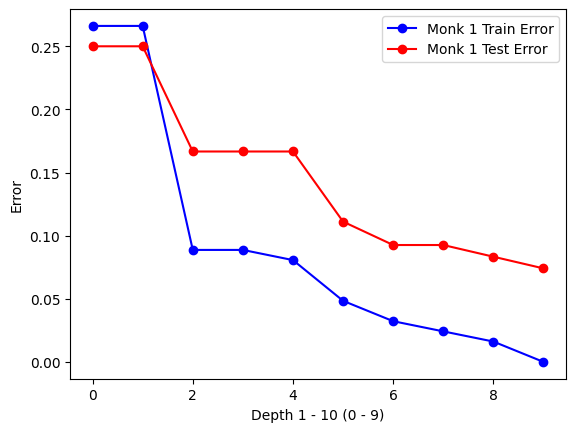

Monk 2 Train and Test Errors for Depths 1-10 (0-9)


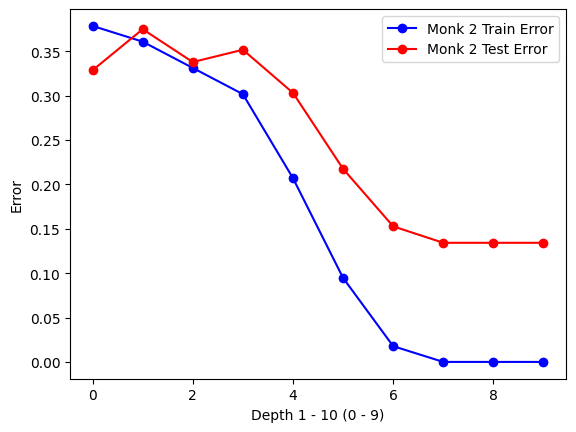

Monk 3 Train and Test Errors for Depths 1-10 (0-9)


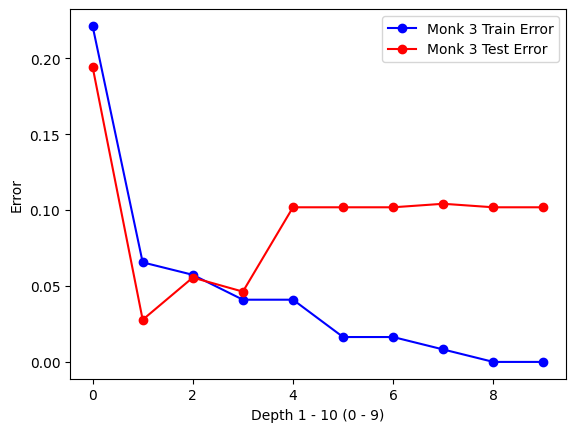

In [29]:
print('Monk 1 Train and Test Errors for Depths 1-10 (0-9)')
plt.plot(monk1_train_errors, 'bo', linestyle='solid', label='Monk 1 Train Error')
plt.plot(monk1_test_errors, 'ro', linestyle='solid', label='Monk 1 Test Error')
plt.legend()
plt.xlabel('Depth 1 - 10 (0 - 9)')
plt.ylabel('Error')
plt.show()

print('Monk 2 Train and Test Errors for Depths 1-10 (0-9)')
plt.plot(monk2_train_errors, 'bo', linestyle='solid', label='Monk 2 Train Error')
plt.plot(monk2_test_errors, 'ro', linestyle='solid', label='Monk 2 Test Error')
plt.legend()
plt.xlabel('Depth 1 - 10 (0 - 9)')
plt.ylabel('Error')
plt.show()

print('Monk 3 Train and Test Errors for Depths 1-10 (0-9)')
plt.plot(monk3_train_errors, 'bo', linestyle='solid', label='Monk 3 Train Error')
plt.plot(monk3_test_errors, 'ro', linestyle='solid', label='Monk 3 Test Error')
plt.legend()
plt.xlabel('Depth 1 - 10 (0 - 9)')
plt.ylabel('Error')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

print("MY TREE")
print("Depth 1:")
M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
ytst = M[:, 0]
Xtst = M[:, 1:]
tree = id3(Xtst, ytst, max_depth=1)
dot_str = to_graphviz(tree)
render_dot_file(dot_str, './my_learned_tree_d1')
y_pred_tst = [predict_example(x, tree) for x in Xtst]
print(confusion_matrix(y_pred_tst, ytst))

print("Depth 3:")
tree = id3(Xtst, ytst, max_depth=3)
print(tree)
dot_str = to_graphviz(tree)
render_dot_file(dot_str, './my_learned_tree_d3')
y_pred_tst = [predict_example(x, tree) for x in Xtst]
print(confusion_matrix(y_pred_tst, ytst))

print("Depth 5:")
tree = id3(Xtst, ytst, max_depth=5)
print(tree)
dot_str = to_graphviz(tree)
render_dot_file(dot_str, './my_learned_tree_d5')
y_pred_tst = [predict_example(x, tree) for x in Xtst]
print(confusion_matrix(y_pred_tst, ytst))

MY TREE
Depth 1:
max_depth = 1
available splits = 16


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [20]:
from sklearn import tree

print("SKLEARN DTC")
print("Depth 1:")
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
dtc = dtc.fit(Xtst, ytst)
print(confusion_matrix(dtc.predict(Xtst), ytst))
dot_str = tree.export_graphviz(dtc)
render_dot_file(dot_str, './sklearn_d1_tree')

SKLEARN DTC
Depth 1:
[[216 108]
 [  0 108]]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [21]:
print("Depth 3:")
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc = dtc.fit(Xtst, ytst)
print(confusion_matrix(dtc.predict(Xtst), ytst))
dot_str = tree.export_graphviz(dtc)
render_dot_file(dot_str, './sklearn_d3_tree')

Depth 3:
[[216 108]
 [  0 108]]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [22]:
print("Depth 5:")
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc = dtc.fit(Xtst, ytst)
print(confusion_matrix(dtc.predict(Xtst), ytst))
dot_str = tree.export_graphviz(dtc)
render_dot_file(dot_str, './sklearn_d5_tree')

Depth 5:
[[216  81]
 [  0 135]]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH